In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb

#Import dataset
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [3]:
#Preliminary data inspection

print("Training data:")
print(df_train.head())

print("Testing data:")
print(df_test.head())

Training data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Sui

In [5]:
#Statistical summary of the datasets
print("Statistical summary:")
print(df_train.describe())
print(df_test.describe())

#Other information about both datasets
print("Other information about both datasets:")
print(df_train.info())
print(df_test.info())

#Check for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Statistical summary:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e

In [6]:
# Convert 'trans_date_trans_time' and 'dob' to datetime
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

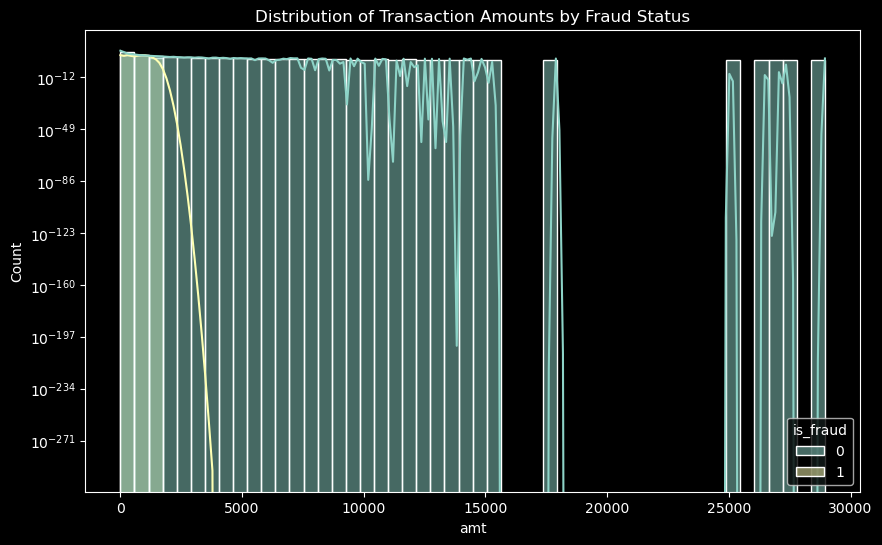

In [8]:
# Example EDA: Distribution of Amounts for Fraudulent and Non-Fraudulent Transactions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='amt', hue='is_fraud', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.yscale('log')  # Log scale can be helpful if data is heavily skewed
plt.show()

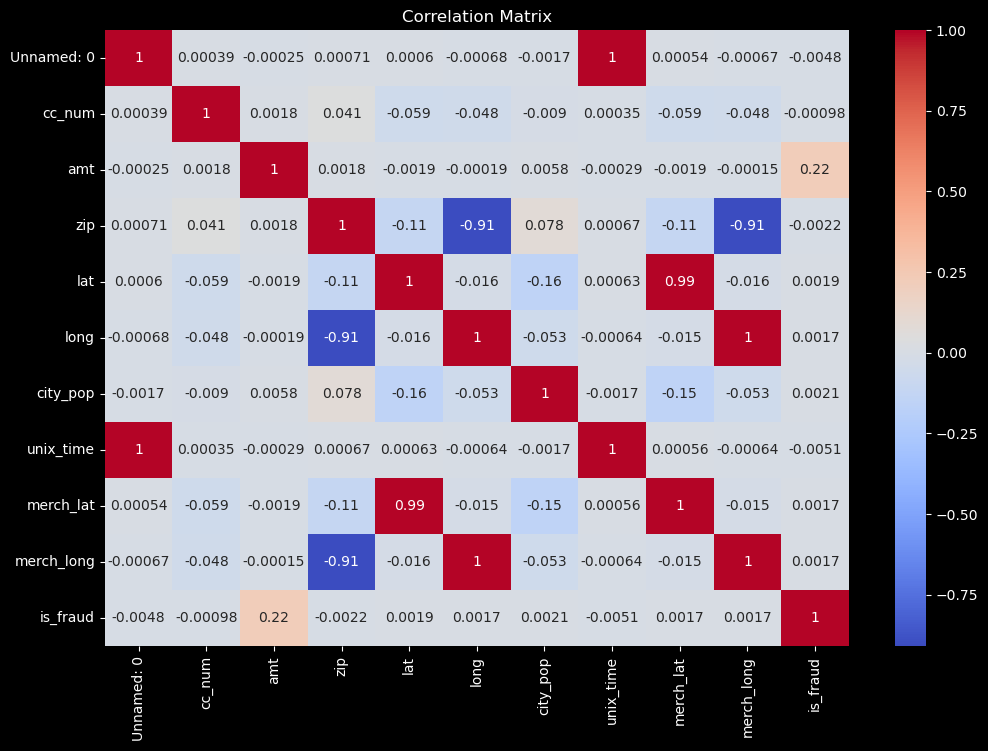

In [9]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
#Drop features with high correlation
df_train.drop(["Unnamed: 0","long", "lat", "merch_long", "merch_lat", "zip", "unix_time","cc_num","city_pop"], axis=1, inplace=True)
df_test.drop(["Unnamed: 0","long", "lat", "merch_long", "merch_lat", "zip", "unix_time","cc_num","city_pop"], axis=1, inplace=True)

#Drop features with high cardinality and non-useful features
df_train.drop(["trans_date_trans_time", 'first','last','street','dob','trans_num'], axis=1, inplace=True)
df_test.drop(["trans_date_trans_time", 'first','last','street','dob','trans_num'], axis=1, inplace=True)

In [10]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Convert 'trans_date_trans_time' to datetime and extract useful features
df_train['transaction_hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.dayofweek
df_test['transaction_hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.dayofweek

# Calculate customer age
df_train['age'] = (df_train['trans_date_trans_time'] - df_train['dob']).dt.days // 365
df_test['age'] = (df_test['trans_date_trans_time'] - df_test['dob']).dt.days // 365

In [14]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   merchant          1296675 non-null  int64  
 1   category          1296675 non-null  int64  
 2   amt               1296675 non-null  float64
 3   gender            1296675 non-null  int64  
 4   city              1296675 non-null  object 
 5   state             1296675 non-null  object 
 6   job               1296675 non-null  object 
 7   is_fraud          1296675 non-null  int64  
 8   transaction_hour  1296675 non-null  int64  
 9   day_of_week       1296675 non-null  int64  
 10  age               1296675 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 108.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------           

In [17]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()

categorical_cols = ['city', 'state', 'job']
for col in categorical_cols:
    df_train[col] = df_train[col].astype(str)
    df_test[col] = df_test[col].astype(str)
    
    # Combine the training and test data, then fit the label encoder
    combined_data = pd.concat([df_train[col], df_test[col]], axis=0)
    label_encoder.fit(combined_data)
    
    # Now transform both training and test data separately
    df_train[col] = label_encoder.transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

In [18]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   merchant          1296675 non-null  int64  
 1   category          1296675 non-null  int64  
 2   amt               1296675 non-null  float64
 3   gender            1296675 non-null  int64  
 4   city              1296675 non-null  int64  
 5   state             1296675 non-null  int64  
 6   job               1296675 non-null  int64  
 7   is_fraud          1296675 non-null  int64  
 8   transaction_hour  1296675 non-null  int64  
 9   day_of_week       1296675 non-null  int64  
 10  age               1296675 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 108.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            ----------

In [19]:
#Scale the numerical variables
# Initialize the StandardScaler
scaler = StandardScaler()

# List of all numerical columns to scale (including the encoded categorical ones)
numerical_cols = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'job', 'transaction_hour', 'day_of_week', 'age']

# Fit the scaler on the training data
scaler.fit(df_train[numerical_cols])

# Transform both training and test data
df_train[numerical_cols] = scaler.transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [20]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
#Gradient Boosting Machine (Greedy algorithm)
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define the features and the target for the training data
X_train = df_train.drop(['is_fraud'], axis=1)
y_train = df_train['is_fraud']

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)
xgb_classifier.fit(X_train, y_train)

# Now let's predict on the test set
X_test = df_test.drop(['is_fraud'], axis=1)
y_test = df_test['is_fraud']
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.91      0.74      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.87      0.91    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy Score: 0.9987061806416552
ROC AUC Score: 0.9963868040611168
